# **Ejercicio 2:**
Los datos (que tienen en el adjunto) corresponden a 6 variables correspondientes a 91 países del mundo (ejemplo MUNDODES del libro de Peña). Realizar el análisis de componentes principales para esos datos (lo que vimos en las clases), realizar el biplot e interpretar todo lo que se pueda respecto al mismo. ¿Qué tan informativo es el biplot? ¿Es de utilidad?

In [13]:
#cargo librerias y datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [6]:
#cargo datos
# Carga de csv a la session de collab
DF_2= pd.read_csv('mundodes.csv')
DF_2.columns = ['pais', 'nat', 'mort', 'mort_inf', 'esp_homb', 'esp_muj', 'pnb']

# Verificar los cambios
print(DF_2.head())


       pais   nat  mort  mort_inf  esp_homb  esp_muj   pnb
0   Albania  24.7   5.7      30.8      69.6     75.5   600
1  Bulgaria  12.5  11.9      14.4      68.3     74.7  2250
2    Checos  13.4  11.7      11.3      71.8     77.7  2980
3   Hungria  11.6  13.4      14.8      65.4     73.8  2780
4   Polonia  14.3  10.2      16.0      67.2     75.7  1690


## Aplicacion de PCA

Estandarizo y aplico PCA

In [7]:
# Aplicacion de PCA

# Solo usar columnas numericas para PCA (excluyo pais)
DF_2_numerico = DF_2.drop('pais', axis=1)

# Estandarizar y centrar los datos
scaler = StandardScaler()
DF_2_estandarizado = scaler.fit_transform(DF_2_numerico)

# Aplicar PCA con el número de componentes=2
pca = PCA(n_components=2)
DF_2_pca = pca.fit_transform(DF_2_estandarizado)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(DF_2_pca, columns=['PC1', 'PC2'])

# Agregar la columna 'pais' al DataFrame de PCA para referencia
pca_df['pais'] = DF_2['pais']

Visualizo la Varianza Explicada

In [10]:
# Varianza explicada por las dos primeras componentes
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por PC1 y PC2:", varianza_explicada)
print("Varianza acumulada por PC1 y PC2:", varianza_explicada.cumsum())

# Mostrar las cargas (coeficientes) de las variables en los primeros dos componentes principales
cargas = pd.DataFrame(pca.components_, columns=DF_2_numerico.columns, index=['PC1', 'PC2'])
print(cargas)


Varianza explicada por PC1 y PC2: [0.78796318 0.1210161 ]
Varianza acumulada por PC1 y PC2: [0.78796318 0.90897928]
          nat      mort  mort_inf  esp_homb   esp_muj       pnb
PC1 -0.416329 -0.341380 -0.439923  0.451961  0.453872  0.326082
PC2 -0.195501  0.680215  0.051931 -0.085340 -0.034239  0.698523


Cuando aplicamos PCA, estamos tratando de transformar las variables originales en componentes principales, que son nuevas variables ortogonales entre sí. Estos componentes principales tienen como objetivo capturar la mayor cantidad posible de la varianza (es decir, la información o dispersión) presente en los datos originales.


---


--> **PC1 (Primer componente principal)** explica aproximadamente el 78.8% de la varianza total de los datos. Esto indica que gran parte de la información contenida en las variables originales puede ser resumida por este primer componente.

--> **PC2 (Segundo componente principal)** explica otro 12.1% de la varianza. Por lo tanto, los dos primeros componentes juntos explican el 90.9% de la varianza total (suma de ambos).

Cuanto mayor es la varianza explicada por los primeros componentes, mejor resumen la estructura de los datos. En este caso, los dos primeros componentes capturan casi el 91% de la información total, lo cual es bastante alto.


---


**Varianza acumulada:**
La varianza acumulada muestra la suma de la varianza explicada por los componentes principales.Después de los dos primeros componentes, se capturo el 90.9% de la varianza.


---


**Tabla de coeficientes (peso de las variables):**
muestra cómo cada variable original contribuye a los dos primeros componentes principales.

**Interpretación de los pesos:**
Cada número en esta tabla representa cuánto influye cada variable original en el componente correspondiente (PC1 o PC2). Los números pueden ser positivos o negativos:

-->Un valor positivo indica que esa variable tiene una influencia positiva sobre el componente (a medida que esa variable aumenta, el componente también aumenta).

-->Un valor negativo indica que esa variable tiene una influencia negativa sobre el componente (a medida que esa variable aumenta, el componente disminuye).

**PC1 (primer componente principal):**
-->Las variables esp_homb (0.451), esp_muj (0.453) y pnb (0.326) tienen cargas positivas, lo que significa que a medida que estas variables aumentan, PC1 también aumenta.

-->Las variables nat (-0.416), mort (-0.341), y mort_inf (-0.440) tienen cargas negativas, lo que significa que cuando estas variables aumentan, PC1 disminuye.

**PC1 parece ser un componente que:** agrupa negativamente las tasas de natalidad, mortalidad y mortalidad infantil, mientras que agrupa positivamente la esperanza de vida (hombres y mujeres) y el producto nacional bruto (PNB). Esto sugiere que PC1 captura un contraste entre países con alta natalidad/mortalidad y aquellos con mejores indicadores de desarrollo (alta esperanza de vida y PNB).

*Cargas negativas en PC1*: Si una variable tiene un valor negativo en PC1, eso significa que un país con una alta tasa en esa variable (como natalidad o mortalidad) tenderá a tener un valor bajo en PC1. En otras palabras, un país con alta natalidad/mortalidad tendrá un puntaje más bajo en PC1.

*Cargas positivas en PC1:* Si una variable tiene un valor positivo en PC1, significa que un país con un alto valor en esa variable (como esperanza de vida o PNB) tenderá a tener un valor alto en PC1. En otras palabras, un país con alta esperanza de vida o PNB tendrá un puntaje más alto en PC1.

**PC1 separa países según niveles de desarrollo(?):**
Países con alta natalidad y mortalidad (que suelen ser países en desarrollo) tienen cargas negativas en PC1, lo que significa que en el espacio de PC1, estos países estarán ubicados en la región con valores negativos.

Países con alta esperanza de vida y alto PNB (que suelen ser países desarrollados o más ricos) tienen cargas positivas en PC1, lo que significa que estarán ubicados en la región con valores positivos de PC1.

**--> PC1 está separando los países según indicadores de desarrollo:**
Países con altos valores de desarrollo humano (alta esperanza de vida y PNB) tienden a estar hacia un extremo positivo de PC1.
Países con desafíos en desarrollo humano (alta natalidad y mortalidad) tienden a estar hacia el extremo negativo de PC1


**PC2 (segundo componente principal):**
La variable mort (0.680) y pnb (0.699) tienen cargas positivas significativas, lo que sugiere que PC2 se ve fuertemente influenciado por estas variables.
El resto de las variables tiene cargas más pequeñas en PC2, lo que indica que no contribuyen tanto a este componente.
Aquí, PC2 parece estar principalmente influenciado por la mortalidad (mort) y el PNB (pnb), aunque en direcciones similares. Esto podría indicar que PC2 separa los países en función de estos factores.

PC2 podría estar capturando países que se encuentran en una transición económica, donde el PNB es relativamente alto pero la mortalidad sigue siendo alta debido a otros factores (por ejemplo: acceso desigual a la salud, pobreza interna, o crisis temporales). Algunos países en crecimiento económico rápido pueden tener altos ingresos en algunas regiones, pero aún enfrentar altos niveles de mortalidad en otras debido a problemas sociales, desigualdad o falta de acceso a servicios básicos.

## Biplot y analisis

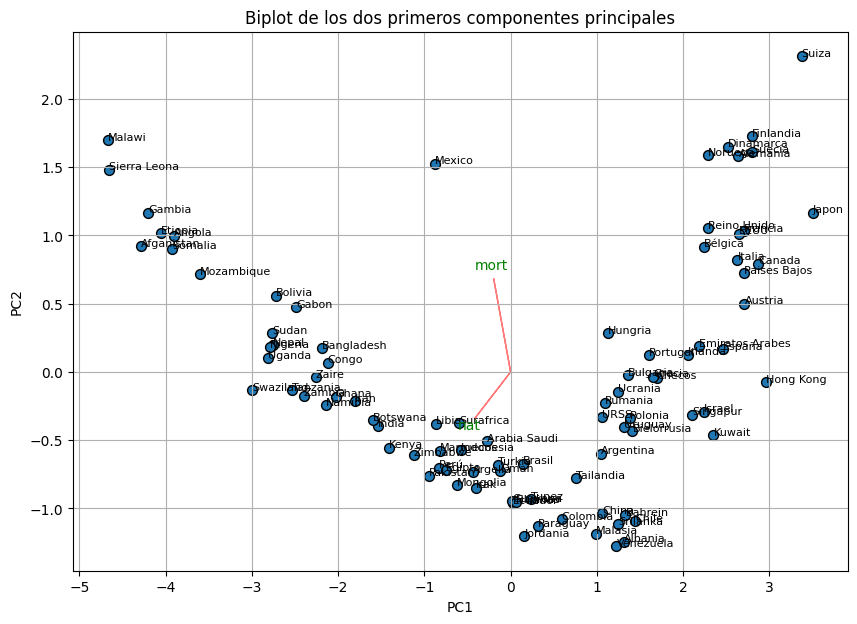

In [11]:
#Biplot
# Generar el Biplot
def biplot(scores, coeff, labels=None):
    plt.figure(figsize=(10, 7))
    xs = scores[:, 0]
    ys = scores[:, 1]
    plt.scatter(xs, ys, edgecolor='k', s=50)

    # Añadir los nombres de los países en la gráfica
    for i, txt in enumerate(pca_df['pais']):
        plt.annotate(txt, (xs[i], ys[i]), fontsize=8)

    # Para las componentes
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.title('Biplot de los dos primeros componentes principales')
    plt.show()

# Llamamos a la función para crear el biplot usando las dos primeras componentes
biplot(DF_2_pca[:, :2], pca.components_[:2, :], labels=DF_2_numerico.columns)

No aparecen las flechas de todas las variables en el biplot y eso puede deberse a que las contribuciones de esas variables a los primeros dos componentes principales son muy bajas, lo que hace que sus vectores (flechas) sean muy cortos o casi invisibles. Esto puede pasar cuando algunas variables no tienen un impacto significativo en los primeros dos componentes del análisis de PCA.

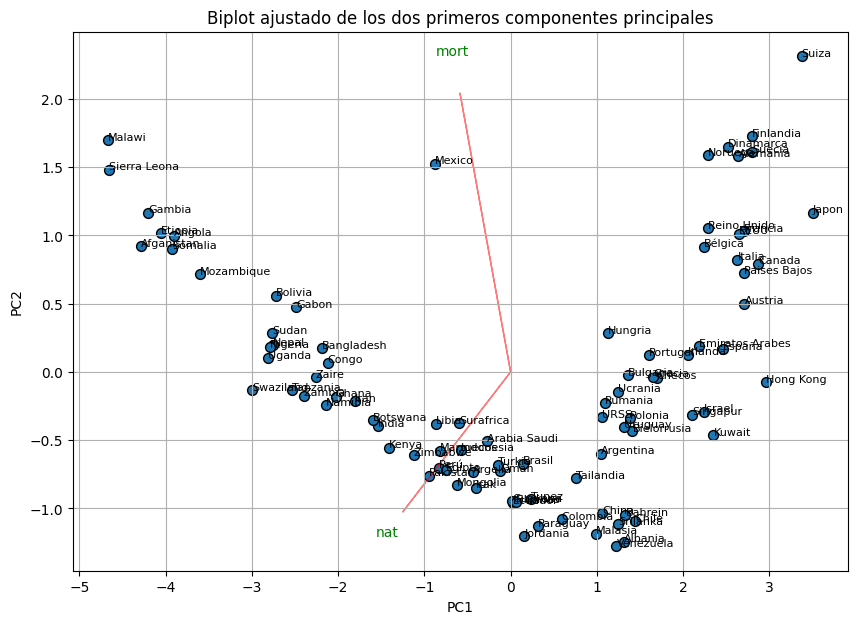

In [12]:
#ajusto las flechas de las demas variables para hacerlas mas visibles, escalamos los coeficientes de esas variables para que parezcan mas largas(a pesar de tener menos contribucion en CP)

# Ajustar el Biplot con escalado de las flechas
def biplot_ajustado(scores, coeff, labels=None, scale_arrow=3):
    plt.figure(figsize=(10, 7))
    xs = scores[:, 0]
    ys = scores[:, 1]
    plt.scatter(xs, ys, edgecolor='k', s=50)

    # agrego los nombres de los países en la gráfica
    for i, txt in enumerate(pca_df['pais']):
        plt.annotate(txt, (xs[i], ys[i]), fontsize=8)

    # Para las componentes (flechas de las variables)
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0] * scale_arrow, coeff[i, 1] * scale_arrow, color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * scale_arrow * 1.15, coeff[i, 1] * scale_arrow * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * scale_arrow * 1.15, coeff[i, 1] * scale_arrow * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.title('Biplot ajustado de los dos primeros componentes principales')
    plt.show()

# Llamamos a la función para crear el biplot ajustado
biplot_ajustado(DF_2_pca[:, :2], pca.components_[:2, :], labels=DF_2_numerico.columns, scale_arrow=3)


Después de ajustar la escala de las flechas seguimos sin ver las demás variables. Sus contribuciones a los primeros dos componentes principales son demasiado peque;as para visualizar y  las variables que no aparecen (esp_homb, esp_muj, mort_inf, etc.) tienen cargas muy bajas en PC1 y PC2, por lo que sus flechas se vuelven casi invisibles en el gráfico. Otro punto relevante es la correlacion que pueden llegar a tener estas variables, por lo cual  que muchas de las variables están fuertemente correlacionadas entre sí explicaria por qué no todas aparecen de manera clara en el biplot.

Una estrategia que podriamos tomar es agregar una tercera componente principal para capturar la info de las variables que no estan en las primeras dos componentes principales y ver que pasa.

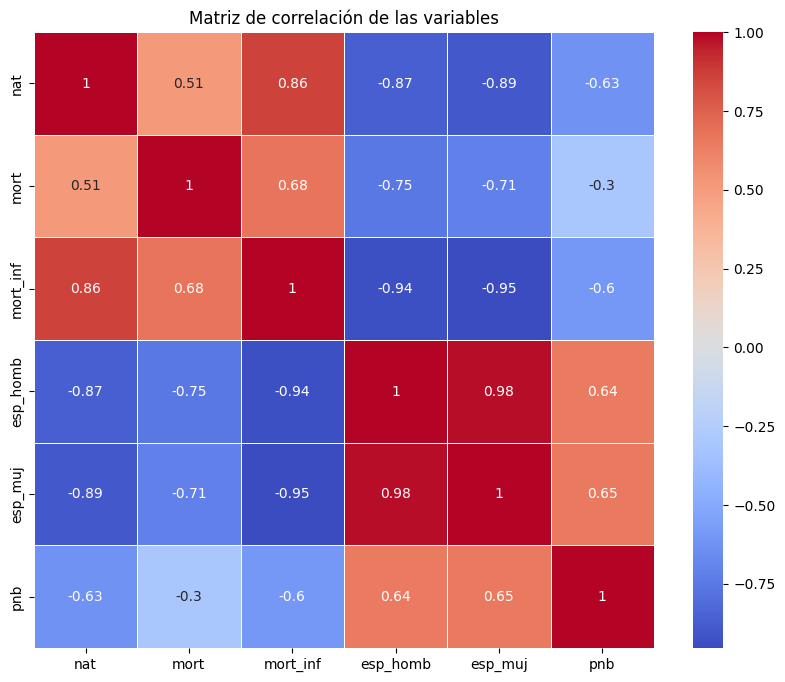

In [14]:
# Calcular la matriz de correlación
correlation_matrix = DF_2_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de correlación de las variables')
plt.show()

## #**Analisis final del biplot**


Los dos primeros componentes principales (PC1 y PC2) explican un 90.9% de la varianza total de los datos:
PC1 explica el 78.8% de la varianza.
PC2 explica el 12.1% de la varianza.

Esto significa que estos dos componentes capturan casi toda la información contenida en los datos originales, por lo que el biplot es una representación  clara de las relaciones entre las variables y los países.


---


1.** PC1**: Contraste entre países en desarrollo y países desarrollados
PC1 presenta una clara diferenciación entre países en desarrollo y países desarrollados:

Variables con cargas negativas en PC1: nat (natalidad), mort (mortalidad) y mort_inf (mortalidad infantil).

Variables con cargas positivas en PC1: esp_homb (esperanza de vida hombres), esp_muj (esperanza de vida mujeres) y pnb (producto nacional bruto).

Este componente captura un contraste entre países con altas tasas de natalidad y mortalidad (países en desarrollo) y países con alta esperanza de vida y PNB (países desarrollados).

Ejemplos:

Malawi, Sierra Leona, Gambia: Se ubican en la parte negativa de PC1, lo que refleja altos niveles de natalidad y mortalidad.
Suiza, Finlandia, Japón: Están en la parte positiva de PC1, lo que refleja altos niveles de esperanza de vida y PNB.


---


2. **PC2**: Relación entre mortalidad y PNB
PC2 capta la relación entre mortalidad y PNB:
Variables con cargas positivas en PC2: mort (mortalidad) y pnb (producto nacional bruto).
Las demás variables tienen coeficientes bajos, lo que indica poca influencia en este componente.
PC2 parece identificar países que tienen altos niveles de PNB pero también altas tasas de mortalidad, lo que podría indicar países en transición económica o con desigualdades en su desarrollo.

Ejemplos:

México: Tiene un PNB relativamente alto pero aún enfrenta desafíos en términos de mortalidad, lo que lo ubica alto en PC2.
Arabia Saudita y Sudáfrica: También combinan altos niveles de PNB con desafíos en mortalidad, como se refleja en sus posiciones en el gráfico.


---


3. **Correlaciones entre las variables**
A través de la matriz de correlación, se observa que varias variables están altamente correlacionadas:

esp_homb y esp_muj tienen una correlación de 0.98, lo que significa que representan prácticamente la misma información. Esto explica por qué una o ambas variables no tienen una flecha claramente visible en el biplot.
mort_inf (mortalidad infantil) también está correlacionada con mort (mortalidad general), por lo que su información ya está representada en el gráfico a través de mort.


---


4. **Interpretación de los países en el biplot**
Países en desarrollo (como Malawi, Sierra Leona, Gambia) están ubicados en la parte negativa de PC1, lo que refleja altos niveles de natalidad y mortalidad, junto con baja esperanza de vida y PNB.

Países desarrollados (como Suiza, Finlandia, Japón) se encuentran en la parte positiva de PC1, lo que refleja alta esperanza de vida y PNB, junto con baja mortalidad y natalidad.

Países en transición económica (como México, Sudáfrica, Arabia Saudita) parecen estar capturados por PC2, que muestra una combinación de alta mortalidad y alto PNB.

# **Ejercicio 3:**
 Bajar el archivo de datos genéticos llamados NCI60 del libro de James-Witten-Hastie-Tibshirani (página 542, u otra según la versión que tengan bajada del libro). Hacer el análisis de componentes principales. ¿Cuál es el porcentaje de la varianza explicada considerando las principales 10 componentes? ¿Cuántas componentes principales debemos considerar para obtener el 92% de la variabilidad explicada?

## Aplicacion de PCA a NCl60

In [20]:
#cargo datos // no consegui exactamente los datos del libro y me los tuve que descargar de kaggle con otros nombres - codigo extra para corregir eso
# Carga de csv a la session de collab
NCI60 = pd.read_csv('NCI60.csv')
# Extraer las etiquetas de la columna 'labs'
nci_labs = NCI60['labs']

# Extraer los datos, que están en todas las columnas excepto 'Unnamed: 0' y 'labs'
nci_data = NCI60.drop(['Unnamed: 0', 'labs'], axis=1)

# Mostrar un ejemplo
print(nci_labs.head())
print(nci_data.head())


0       CNS
1       CNS
2       CNS
3     RENAL
4    BREAST
Name: labs, dtype: object
     data.1    data.2    data.3    data.4    data.5        data.6    data.7  \
0  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
1  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
2  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
3  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
4  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   

     data.8    data.9   data.10  ...  data.6821  data.6822  data.6823  \
0 -0.315000 -0.450000 -0.654980  ...  -0.990020   0.000000   0.030000   
1  0.724961 -0.040039 -0.285019  ...  -0.270058  -0.300039  -0.250039   
2  0.645000  0.430000  0.475019  ...   0.319981   0.120000  -0.740000   
3  0.245000  0.020000  0.095019  ...  -1.240020  -0.110000  -0.160000   
4  0.110000  0.235000  1.490019  ...   0.554980  -0.775000  -0.515000   



In [27]:
#PCA : en el libro se indica que no es tan necesario hacer scaler porque los genes se miden en la misma medida

# Paso 1: Estandarización de los datos (excluyendo las etiquetas)
scaler = StandardScaler()
nci_data_scaled = scaler.fit_transform(nci_data)

# Paso 2: Aplicación del PCA
pca = PCA(n_components=64)  # podriamos calcular tantos componentes como columnas tengamos en los datos
pca.fit(nci_data_scaled)


## Porcentaje de Varianza Explicada con 10 componentes ppales

Porcentaje de varianza explicada por las primeras 10 componentes:
[0.11358942 0.18115144 0.23866987 0.28114541 0.31849513 0.35468144
 0.38534366 0.41220269 0.43749767 0.46125636]


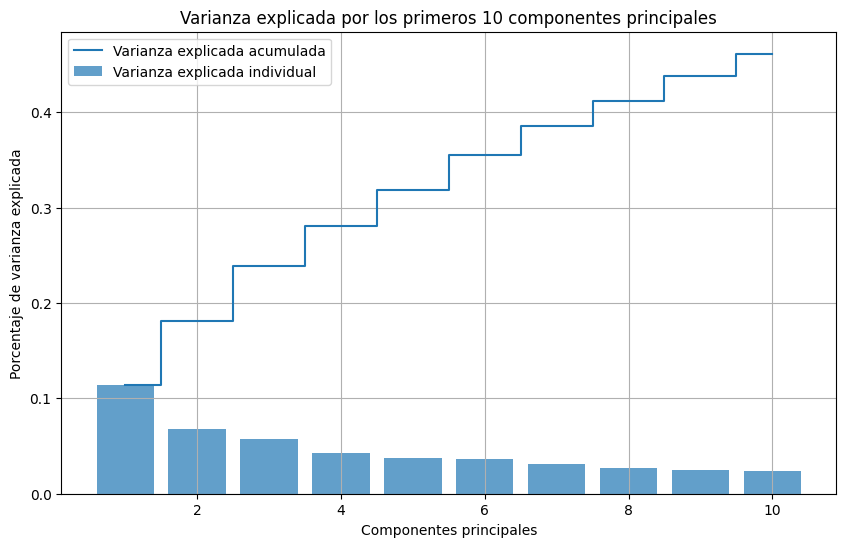

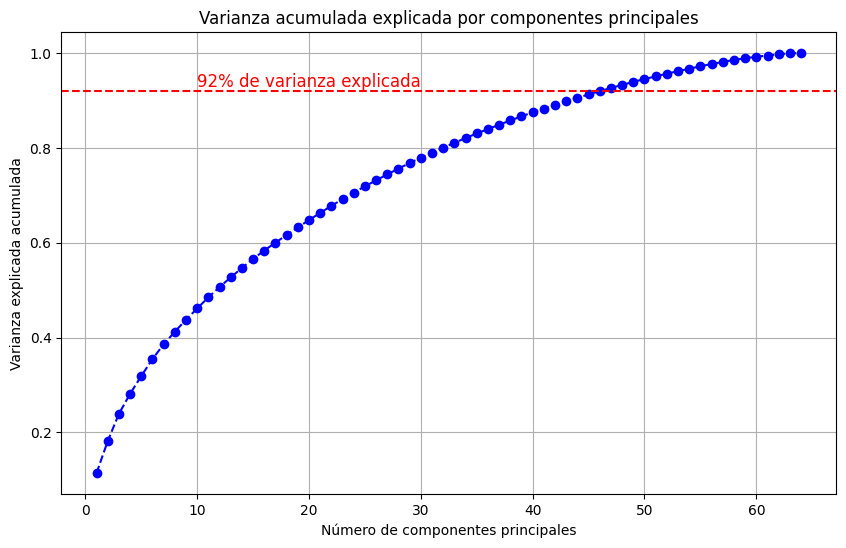

In [28]:
#porcentaje de varianza explicada 10 comp pples
# Paso 3: Varianza explicada por los primeros 10 componentes principales
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Mostrar el porcentaje de la varianza explicada por los primeros 10 componentes
print("Porcentaje de varianza explicada por las primeras 10 componentes:")
print(varianza_acumulada[:10])

# Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# Gráfico 1: Porcentaje de varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), varianza_explicada[:10], alpha=0.7, align='center', label='Varianza explicada individual')
plt.step(range(1, 11), varianza_acumulada[:10], where='mid', label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por los primeros 10 componentes principales')
plt.legend(loc='best')
plt.grid()
plt.show()

# Gráfico 2: Varianza acumulada explicada por todas las componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.axhline(y=0.92, color='r', linestyle='--')
plt.text(10, 0.93, '92% de varianza explicada', color = 'red', fontsize=12)
plt.ylabel('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.title('Varianza acumulada explicada por componentes principales')
plt.grid()
plt.show()

## Cuantos componentes para llegar a 92% de variabilidad explicada?

In [29]:
#hacer el grafico de varianza explicada acumulada
# Paso 4: Determinar cuántas componentes necesitamos para explicar el 92% de la variabilidad
num_componentes_92 = np.argmax(varianza_acumulada >= 0.92) + 1  # +1 porque np.argmax devuelve el índice
print(f"\nNúmero de componentes necesarios para explicar el 92% de la variabilidad: {num_componentes_92}")


Número de componentes necesarios para explicar el 92% de la variabilidad: 47


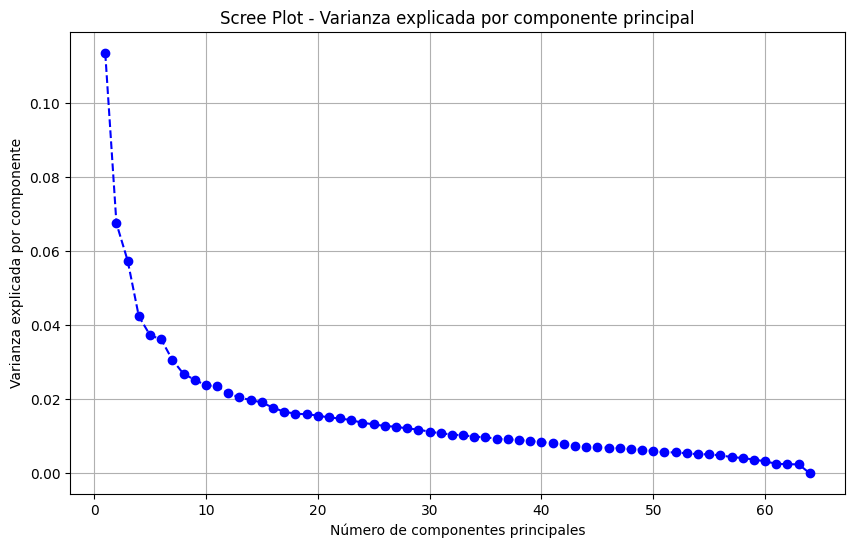

In [30]:
# Gráfico de de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', linestyle='--', color='b')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada por componente')
plt.title('Grafico del codo - Varianza explicada por componente principal')
plt.grid(True)
plt.show()


Por que precisamos tantos componentes ppales (47) para llegar al 92% de la variabilidad?

**Alta dimensionalidad del conjunto de datos:**

El dataset tiene 64 muestras (filas) y 6830 variables (columnas). Este tipo de datos con un número mucho mayor de variables que de muestras tiene una alta dimensionalidad.
Los datos de alta dimensionalidad contienen mucha información que se dispersa en muchas direcciones en el espacio de características. Por eso, para capturar un porcentaje alto de la varianza, necesitamos más componentes principales, ya que la información está distribuida en muchas direcciones.

**Variabilidad distribuida entre muchas variables:**

Aunque hay algunas variables más influyentes que otras, los datos tienen mucha redundancia o pequeñas variaciones distribuidas en muchas variables.
En los datos con muchas características, cada componente principal captura una pequeña cantidad de la varianza. Como resultado, se necesitan muchos componentes para capturar una porción significativa de la variabilidad.
Relaciones no tan fuertes entre las variables:

Si las variables no están fuertemente correlacionadas, cada componente principal capturará información única de un grupo pequeño de variables, lo que significa que se necesitan más componentes para representar una mayor parte de la variabilidad de los datos.

**Poco ruido capturado en los primeros componentes:**

En muchos conjuntos de datos, los primeros componentes principales tienden a capturar la mayor parte de la información útil o estructurada, mientras que los siguientes componentes capturan ruido o variaciones menores.
Sin embargo, en este caso, parece que las primeras componentes principales no están capturando de forma suficiente la información, por lo que se necesitan más componentes para alcanzar el 92%.


---


 Aunque 47 componentes pueden parecer muchos, el hecho de que se reduce el número de dimensiones desde 6830 a 47 sigue siendo un avance ya que la reducción de dimensionalidad es muy significativa. Además, estos 47 componentes explican el 92% de la variabilidad en los datos lo que implica que podriamos trabajar con una representación mucho más manejable sin perder demasiada información.

